In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
import torch
import sys 
sys.path.append("../../")
from uv_coverage import sim_uv_cov

In [15]:


# Simuating a uv coverage
h = 1e-2 # hours
grid, noise_rms, u, v, ants1, ants2 = sim_uv_cov(h) # u, v in meters
uv = np.array([u, v]).transpose()
# Gridding and calculating the counts in each cell of the grid

npix = 64
u_edges = np.linspace(u.min(), u.max(), npix + 1, endpoint = True)
v_edges = np.linspace(v.min(), v.max(), npix + 1, endpoint = True)
counts, *_ = binned_statistic_2d(u, v, np.ones(u.shape[0]), "count", (u_edges, v_edges))

In [16]:
sampling_function = np.array(counts>0, dtype = np.int32)
S = np.fft.fftshift(sampling_function).flatten()

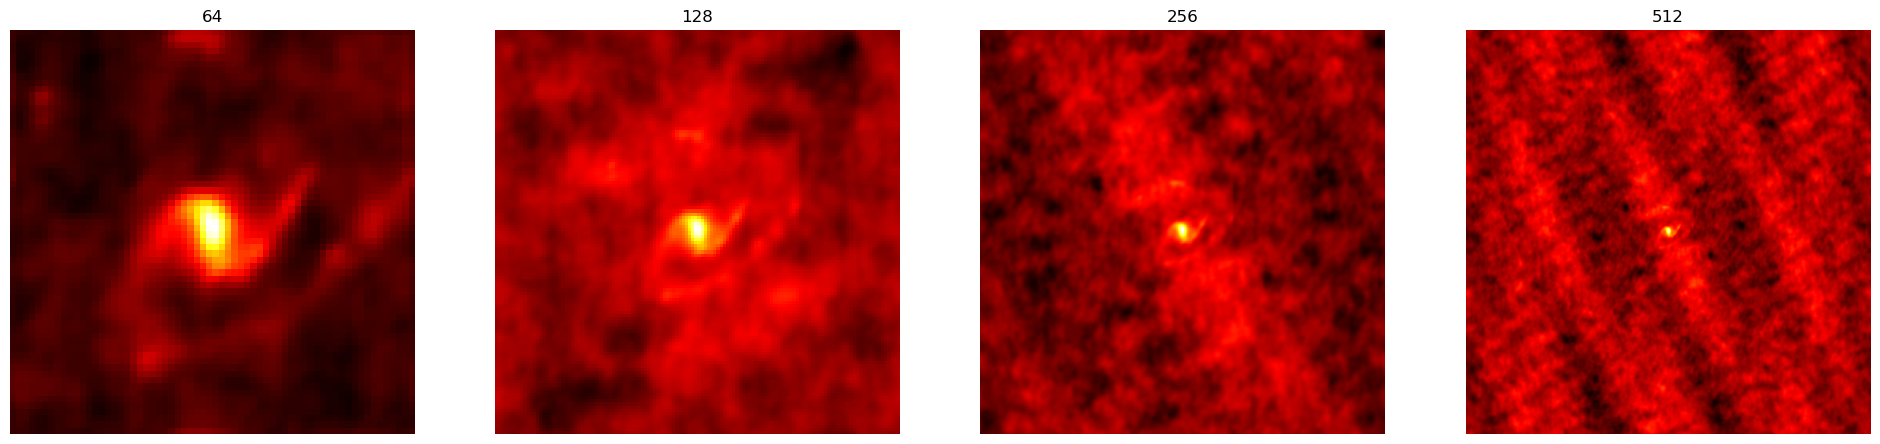

In [20]:
image = torch.load("../../probes_64.pt")[1].numpy()
sigma_n = 1e-5

    
fig, axs = plt.subplots(1, 4, figsize=(4*6, 6))
pixels = 2**np.arange(6, 10)
pads = ((pixels - 64) // 2)
for i in range(len(pixels)):
    pad = pads[i]
    img = np.pad(image, (pad, pad), 'constant', constant_values=(0, 0))

    u_edges = np.linspace(u.min(), u.max(), int(pixels[i]) + 1, endpoint = True)
    v_edges = np.linspace(v.min(), v.max(), int(pixels[i]) + 1, endpoint = True)
    counts, *_ = binned_statistic_2d(u, v, np.ones(u.shape[0]), "count", (u_edges, v_edges))
    sampling_fn = counts > 0
    
    p_center = img.shape[0]//2
    pmin = p_center - 32
    pmax = p_center + 32

    #z = np.random.normal(size=img.shape) * sigma_n / 2**(1/2) + 1j * np.random.normal(size=img.shape) * sigma_n / 2**(1/2) 
    img_tilde = np.fft.fft2(img) * np.fft.fftshift(sampling_fn)# + z * np.fft.fftshift(sampling_fn)
    dirty_img = np.fft.ifft2(img_tilde)
    
    #dirty_img = dirty_img[pmin:pmax, pmin:pmax]


    axs[i].imshow(dirty_img.real, cmap="hot")
    axs[i].set_title(f"{pixels[i]}")
    axs[i].axis("off")

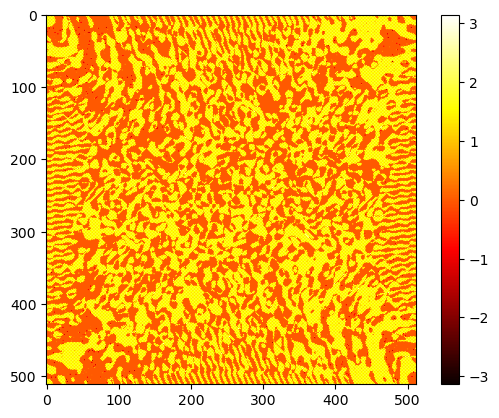

In [28]:
plt.imshow(img_tilde, cmap = "hot")
plt.colorbar()

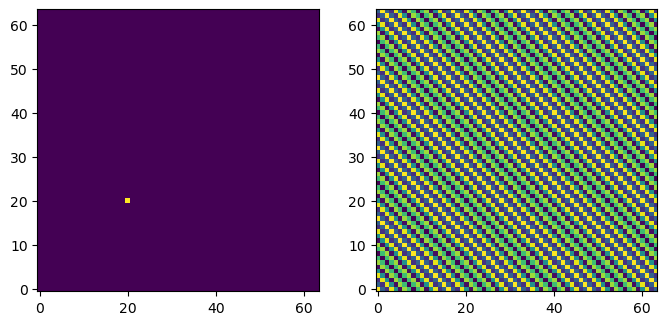

In [19]:
img_test = np.zeros(shape = (64, 64))
img_test[20, 20] = 1

fig, axs = plt.subplots(1, 2, figsize = (8, 4))
axs[0].imshow(img_test, origin = "lower")
axs[1].imshow(np.fft.fft2(img_test).real, origin = "lower")

In [37]:
sampling_function = counts>0

In [46]:
2**5

32